In [35]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
# import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import save_img
from keras_preprocessing.image import img_to_array
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Read the data into Google Colab using .read_csv() function.**

In [38]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW8 data.csv')

**2. Print the first and last five rows of the dataframe using .head() and .tail() functions. How many observations (i.e., sample size) do you have in total?**

In [39]:
data.head()
data.tail()
print("Sample size is", len(data))

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


Sample size is 2126


**3. Use .info() to get a short description of the dataframe.**

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

**4. Take a look at the target (i.e., fetal_health) using .value_counts() function. What is the prevalence of each fetal health status in the dataframe?**

In [41]:
data['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

**5. Report the descriptive statistics of the numerical features using .describe() function.**

In [42]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**6. Choose five numerical features of your interest and plot histograms for each feature.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7ec00040>,
      dtype=object)

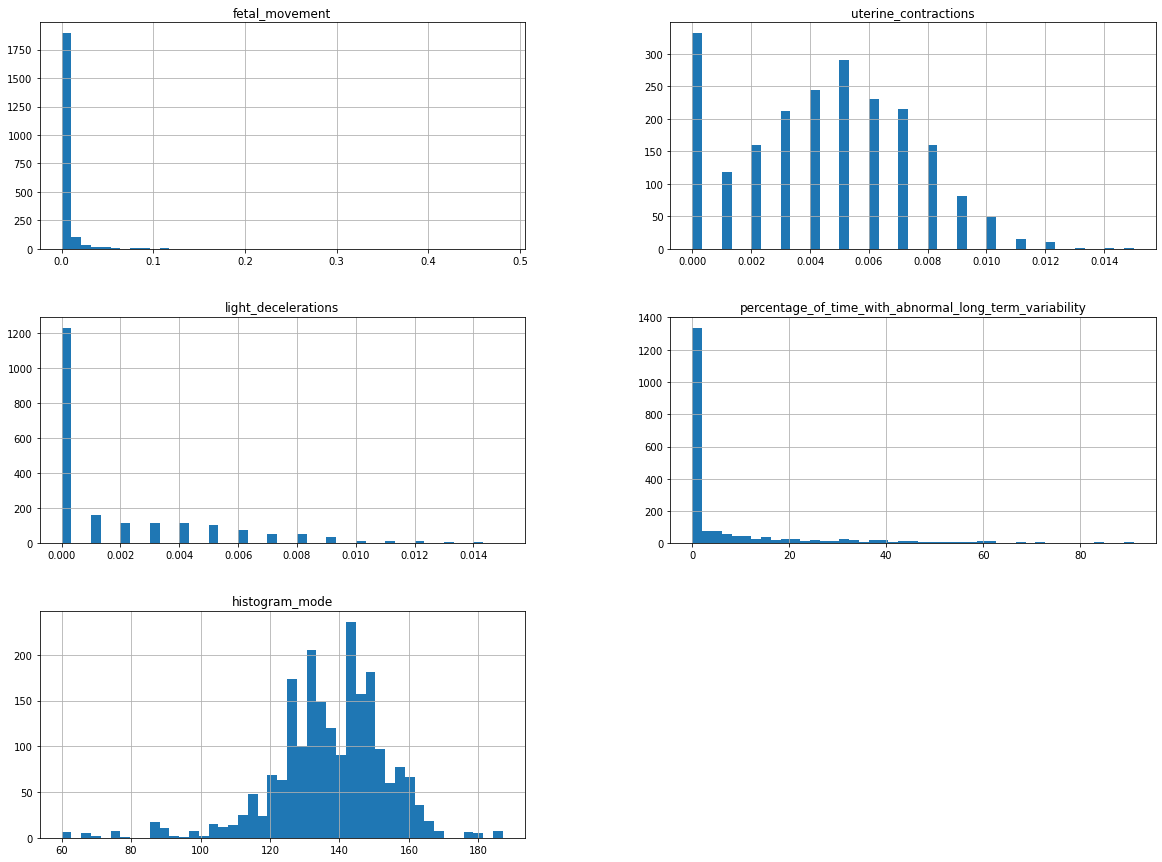

In [43]:
data.hist(column=['fetal_movement','uterine_contractions','light_decelerations','percentage_of_time_with_abnormal_long_term_variability','histogram_mode'],bins=45,figsize=(20,15))

**7. Plot a scatter matrix of the features in question 6 and the target. Pay special attention to the bivariate relationship between each of the features and the target. What relationships can you tell, if any, between any features and the target (describe the direction of a relationship: positive or negative)?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7dd95340>,
      dtype=object)

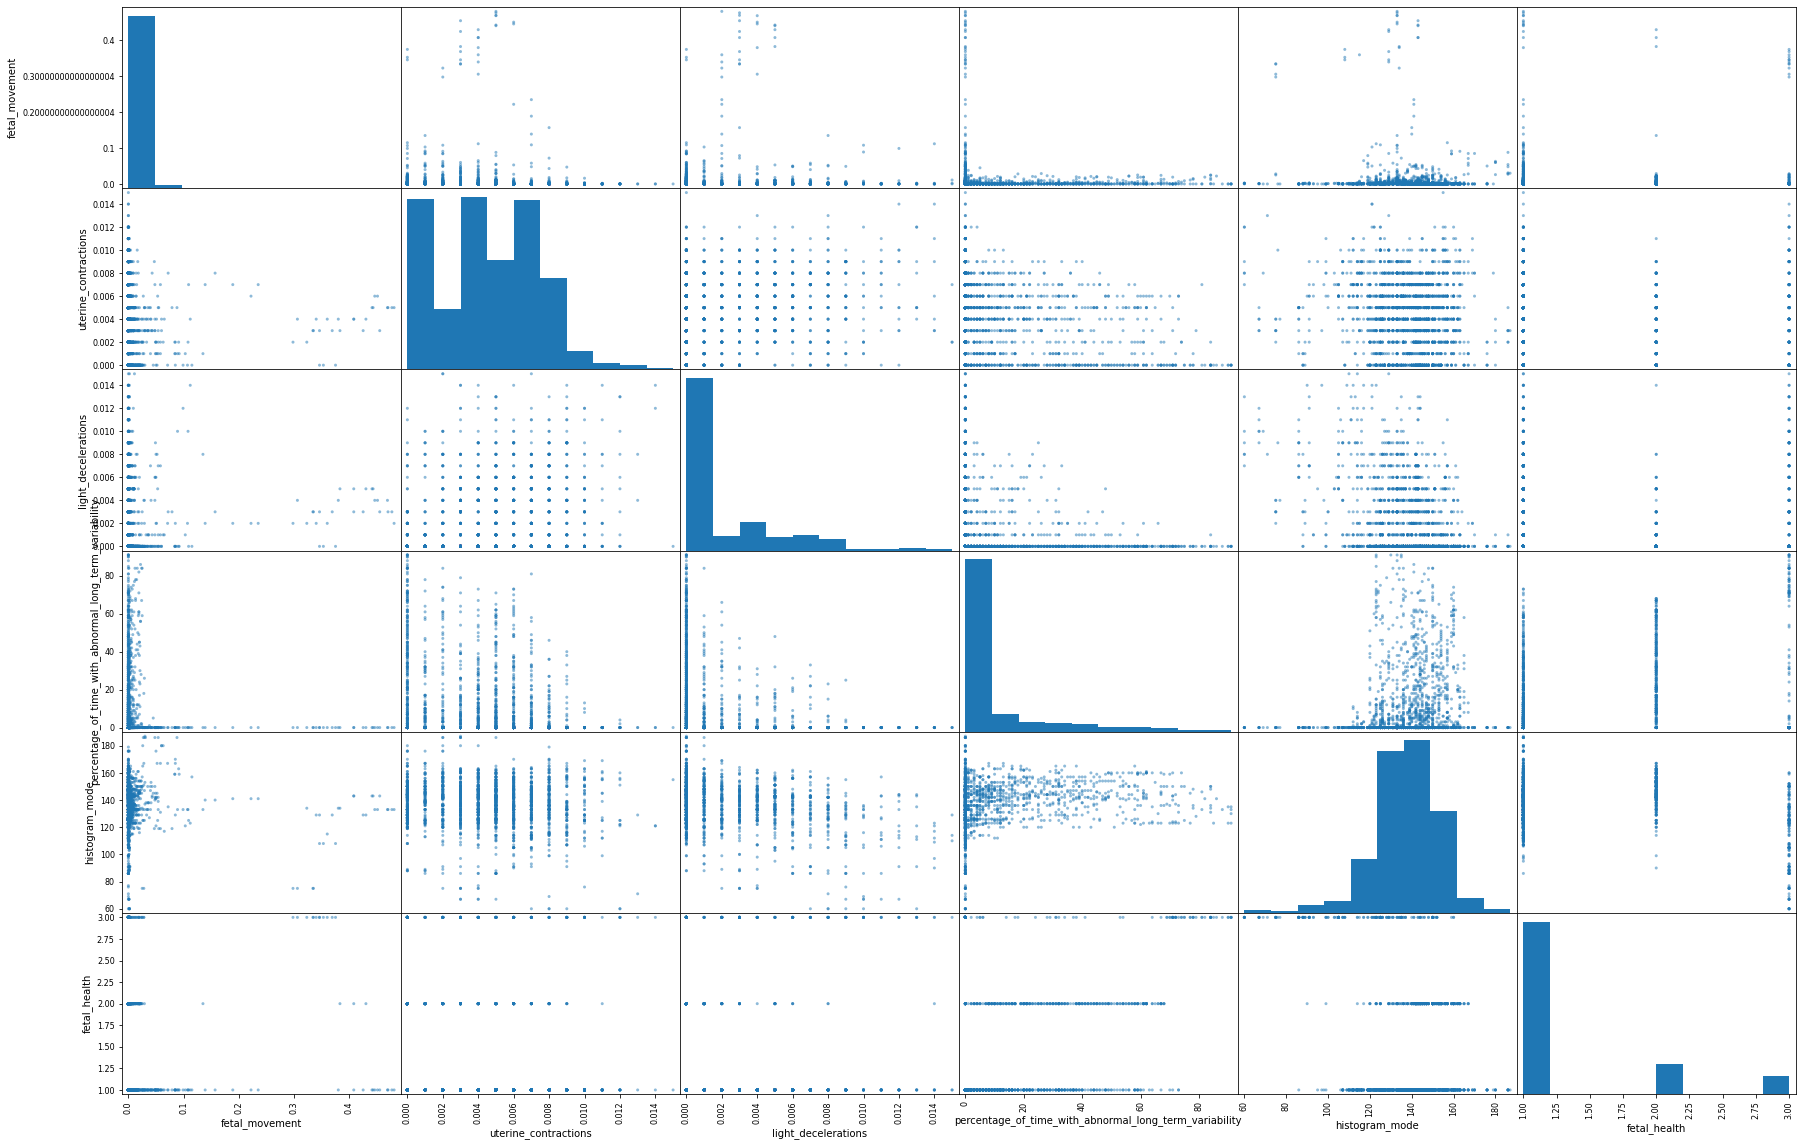

In [44]:
scatter_matrix(data[['fetal_movement','uterine_contractions','light_decelerations','percentage_of_time_with_abnormal_long_term_variability','histogram_mode','fetal_health']], figsize = (30, 20))

**8. Create a pipeline to process numeric features (all features are numeric in the dataframe) using .Pipeline() function. In the pipeline, include the following two processes: first, replace missing values of a feature with its median; and second, standardize the feature.**

In [45]:
# create a pipeline to process numerical features
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), # replace missing values, if any, with the median of a feature
    ('std_scaler', StandardScaler()) # standardize a feature
  ])

**9. Use .train_test_split() function to split the dataframe into train set and test set, in which the test set occupies 20% of the data. (Hint: you might need to create two NumPy arrays, one for the features and the other for the target before applying the .train_test_split().)**

In [46]:
# seperate the target (fetal_health) from the features
y = np.c_[data['fetal_health']] # target
X = data.drop('fetal_health', axis = 1) # features
print(X.shape)
print(y.shape)

# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, # features 
    y, # target
    test_size = 0.2, # 20% data to be included in the test set 
    random_state = 42 # specify random seed for results replication
  )

(2126, 21)
(2126, 1)


**10. Fit and transform the train set using the pipeline.**

In [47]:
X_train = num_pipline.fit_transform(X_train)

**11. Transform the test set using the pipeline.**

In [48]:
X_test = num_pipline.transform(X_test)

**12. Fit a stochastic gradient descent (SGD) classifier on the train set.**

In [49]:
sgd_clf = SGDClassifier(random_state = 42)
#sgd_clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

**13. Measure the accuracy of using 5-fold cross-validation on the train set.**

In [50]:
cross_val_score(sgd_clf, X_train, y_train.ravel(), cv = 5, scoring = 'accuracy')

array([0.91764706, 0.83823529, 0.87058824, 0.88529412, 0.90882353])

**14. Use .DummyClassifier() function to obtain the baseline accuracy (i.e., “raw” accuracy based on the simple majority rule without modeling). Compare the baseline accuracy to the model accuracy reported in 13. Does your model perform better than the baseline?**

In [51]:
dummy_clf = DummyClassifier(random_state = 42)
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
print('\n')
dummy_clf.score(X_train, y_train)

# Model accuracy in 13 performs better than the baseline

DummyClassifier(random_state=42)

array([1, 1, 1, ..., 1, 1, 1])

0.7776470588235294

**15. Construct a confusion matrix based on the predictions made by the SGD classifier on the test set.**

[[309  24   0]
 [ 24  40   0]
 [  4   7  18]]


<Figure size 360x288 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

Text(24.0, 0.5, 'Actal Values')

Text(0.5, 15.0, 'Predicted Values')

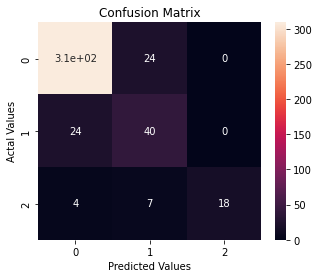

              precision    recall  f1-score   support

     class 0       0.92      0.93      0.92       333
     class 1       0.56      0.62      0.59        64
     class 2       1.00      0.62      0.77        29

    accuracy                           0.86       426
   macro avg       0.83      0.72      0.76       426
weighted avg       0.87      0.86      0.86       426



In [52]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test.ravel(), cv = 5)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_test_pred, target_names=target_names))

**16. Calculate and print precision, recall, and F-1 score based on the predictions made by the SGD classifier on the test set.**

In [56]:
precision_sgd = precision_score(y_test, y_test_pred, average='macro')
recall_sgd = recall_score(y_test, y_test_pred, average='macro')
f1_sgd = f1_score(y_test, y_test_pred, average='macro')
print('precision: {}, recall: {}, f1: {}'.format(precision_sgd, recall_sgd, f1_sgd))

precision: 0.826764742759226, recall: 0.7245391943667805, f1: 0.7603126997008652


**17. Train a random-forest classifier and compare modeling results (i.e., accuracy, precision, recall, and F-1 score on the test set) with those obtained from the SGD classifier.**

In [57]:
rndfrst_clf = RandomForestClassifier(random_state = 42)
rndfrst_clf.fit(X_train, y_train)
y_pred_rndfrst = rndfrst_clf.predict(X_test)

precision_rndfrst = precision_score(y_test, y_pred_rndfrst, average='macro')
recall_rndfrst = recall_score(y_test, y_pred_rndfrst, average='macro')
f1_rndfrst = f1_score(y_test, y_pred_rndfrst, average='macro')
print('\n')
print('SGD _ precision {}, recall: {}, f1: {}'.format(precision_sgd, recall_sgd, f1_sgd))
print('Random Forest _ precision: {}, recall: {}, f1: {}'.format(precision_rndfrst, recall_rndfrst, f1_rndfrst))

<ipython-input-57-1558f3b00c06>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndfrst_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)



SGD _ precision 0.826764742759226, recall: 0.7245391943667805, f1: 0.7603126997008652
Random Forest _ precision: 0.9315700372467907, recall: 0.8938814892478685, f1: 0.9106523861727746
